In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
data = pd.read_csv('../data/datadaily/data_daily0.csv', index_col='Date_time_nr')
Xdata = data.drop(columns=['P_avg'])
ydata = data[['P_avg']]

In [97]:
data.describe()

,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,P_avg
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,10.875349,1017.225291,79.025458,3.477724,172.108438,0.062491,0.001347,332.536519
std,6.937008,7.971215,13.383810,1.668870,64.228294,0.151186,0.014370,342.437588
min,-5.910000,981.125000,38.458333,1.020833,11.500000,0.000000,0.000000,-6.032708
25%,5.287292,1012.750000,69.052083,2.234688,122.375000,0.000000,0.000000,88.590990
50%,10.753993,1017.458333,81.354167,3.044167,183.895833,0.000000,0.000000,215.961562
75%,16.035937,1022.333333,89.781250,4.349687,221.666667,0.041927,0.000000,450.027708
max,29.057500,1042.041667,100.000000,14.297083,330.416667,1.822500,0.252500,2018.135695


In [41]:
mask = data['P_avg'] < 0
data[mask]

,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,P_avg
Date_time_nr,,,,,,,,
1357689600,0.994167,1022.791667,96.916667,2.427083,196.666667,0.017917,0.000000,-0.275764
1361750400,-1.209583,1019.041667,92.708333,1.301667,136.000000,0.020833,0.000000,-0.140556
1414281600,11.494167,1025.083333,91.666667,1.614167,105.916667,0.000000,0.000000,-0.118125
1424044800,0.920417,1019.166667,99.708333,1.092917,44.250000,0.000000,0.000000,-0.446458
1453248000,-3.082500,1019.666667,88.625000,1.395000,84.666667,0.000000,0.000000,-2.653542
1480118400,7.386250,1016.125000,89.583333,1.281250,77.416667,0.000000,0.000000,-0.551597
1483315200,-0.355000,1023.583333,100.000000,2.443333,238.333333,0.000000,0.028333,-0.761458
1483401600,-1.379583,1027.500000,98.833333,2.591250,213.500000,0.000000,0.000000,-3.422986
1483488000,0.083333,1022.041667,100.000000,5.444583,277.916667,0.020833,0.009167,-4.777014


In [4]:
data.head()
#Xdata.head()
#ydata.head()

,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,P_avg
Date_time_nr,,,,,,,,
1356998400,5.314167,1012.458333,88.083333,5.037083,212.500000,0.332917,0.0,782.613541
1357084800,2.317500,1027.291667,93.625000,3.236250,222.500000,0.000000,0.0,160.549097
1357171200,4.582500,1037.041667,95.166667,5.037083,209.583333,0.041667,0.0,396.093055
1357257600,7.101250,1037.791667,97.666667,2.915417,246.250000,0.000000,0.0,117.150973
1357344000,5.635000,1034.791667,94.166667,2.014167,232.083333,0.000000,0.0,62.375833


In [47]:
jdata = pd.read_json('../data/json/jdata1.json', orient='split')

In [48]:
jdata.head()

,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h
2013-01-01,5.314167,1012.458333,88.083333,5.037083,212.500000,0.332917,0
2013-01-02,2.317500,1027.291667,93.625000,3.236250,222.500000,0.000000,0
2013-01-03,4.582500,1037.041667,95.166667,5.037083,209.583333,0.041667,0
2013-01-04,7.101250,1037.791667,97.666667,2.915417,246.250000,0.000000,0
2013-01-05,5.635000,1034.791667,94.166667,2.014167,232.083333,0.000000,0


# ML

In [42]:
from sklearn.preprocessing import MinMaxScaler

def ML_scaler(data, scaler=None):
    if scaler == None:
        return data
    cols = data.columns
    index = data.index
    data_sc = pd.DataFrame(data =  scaler.fit_transform(data), columns=cols, index=index)
    return data_sc

def add_yearly_fourier(df):
    # timestamps as date
    ts = pd.to_datetime(df.index, unit='s')
    # Day of year (1..365 or 366 for leap)
    day_of_year = ts.dayofyear
    # Period T = 365 days (approx yearly cycle)
    T = 365
    # Add Fourier components
    df["year_sin"] = np.sin(2 * np.pi * day_of_year / T)
    df["year_cos"] = np.cos(2 * np.pi * day_of_year / T)
    return df

def encode_wind_direction_circular(df):
    """
    Add smooth circular (sin/cos) encoding for wind direction in degrees (0–360).
    """
    # Normalize angle to 0–360
    theta = np.deg2rad(df['wind_deg'] % 360)
    df["wind_sin"] = np.sin(theta)
    df["wind_cos"] = np.cos(theta)
    df.drop(columns=['wind_deg'], inplace=True)
    return df
    
def pipeline(Xdata):
    scaler = MinMaxScaler()
    data = ML_scaler(Xdata, scaler)
    data = encode_wind_direction_circular(data)
    data = add_yearly_fourier(data)

    return data


In [ ]:
#encode_wind_direction_circular(jdata)
#add_yearly_fourier(jdata)
#scaler = MinMaxScaler()
#ML_scaler(Xdata, scaler)

In [50]:
pipeline(Xdata)

,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,wind_sin,wind_cos,year_sin,year_cos
Date_time_nr,,,,,,,,,,
1356998400,0.320989,0.514364,0.806364,0.302514,0.182670,0.000000,0.011000,0.999939,1.721336e-02,0.999852
1357084800,0.235290,0.757866,0.896412,0.166871,0.000000,0.000000,0.011547,0.999933,3.442161e-02,0.999407
1357171200,0.300064,0.917921,0.921462,0.302514,0.022862,0.000000,0.010840,0.999941,5.161967e-02,0.998667
1357257600,0.372096,0.930233,0.962085,0.142705,0.000000,0.000000,0.012847,0.999917,6.880243e-02,0.997630
1357344000,0.330164,0.880985,0.905213,0.074820,0.000000,0.000000,0.012072,0.999927,8.596480e-02,0.996298
...,...,...,...,...,...,...,...,...,...,...
1514332800,0.304354,0.127223,0.827353,0.454320,0.159122,0.000000,0.010886,0.999941,-6.880243e-02,0.997630
1514419200,0.202664,0.380985,0.813135,0.265418,0.000000,0.000000,0.013166,0.999913,-5.161967e-02,0.998667
1514505600,0.226627,0.442544,0.813135,0.426733,0.005258,0.135314,0.010430,0.999946,-3.442161e-02,0.999407


In [51]:
pipeline(jdata)

,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,wind_sin,wind_cos,year_sin,year_cos
2013-01-01,0.707375,0.000000,0.000000,1.000000,1.000000,0.0,0.013312,0.999911,0.017213,0.999852
2013-01-02,0.216688,0.585526,0.578261,0.484679,0.000000,0.0,0.014539,0.999894,0.034422,0.999407
2013-01-03,0.587569,0.970395,0.739130,1.000000,0.125156,0.0,0.012954,0.999916,0.051620,0.998667
2013-01-04,1.000000,1.000000,1.000000,0.392870,0.000000,0.0,0.017452,0.999848,0.068802,0.997630
2013-01-05,0.759910,0.881579,0.634783,0.134971,0.000000,0.0,0.015714,0.999877,0.085965,0.996298
2013-01-06,0.652930,0.768092,0.800000,0.124359,0.000000,0.0,0.016456,0.999865,0.103102,0.994671
2013-01-07,0.488845,0.631579,0.491304,0.000000,0.000000,0.0,0.000000,1.000000,0.120208,0.992749
2013-01-08,0.187897,0.608553,0.878261,0.110290,0.000000,0.0,0.007842,0.999969,0.137279,0.990532
2013-01-09,0.000000,0.407895,0.921739,0.253130,0.053817,0.0,0.011369,0.999935,0.154309,0.988023
2013-01-10,0.310500,0.162829,0.878261,0.723620,0.168961,0.0,0.014590,0.999894,0.171293,0.985220


# ML2


In [9]:
# how to run  
data.head(1)
display(data.shape)
#data_f = feature_pipeline(data)
#data_f.head()
scaler = MinMaxScaler()

X_train, y_train = prepare_lagged_data(
    data,
    window_size=24,
    target_col=data.columns.get_loc("P_avg"),
    scaler=scaler,
    fit_scaler=True
)
X_train.shape, y_train.shape

(1826, 8)

In [76]:
from sklearn.preprocessing import MinMaxScaler

def add_yearly_fourier(df):
    ts = pd.to_datetime(df.index)
    day_of_year = ts.dayofyear
    T = 365.25

    df = df.copy()
    df["year_sin"] = np.sin(2 * np.pi * day_of_year / T)
    df["year_cos"] = np.cos(2 * np.pi * day_of_year / T)
    return df


def encode_wind_direction_circular(df):
    df = df.copy()
    theta = np.deg2rad(df["wind_deg"] % 360)
    df["wind_sin"] = np.sin(theta)
    df["wind_cos"] = np.cos(theta)
    df.drop(columns=["wind_deg"], inplace=True)
    return df


def feature_pipeline(df):
    df = encode_wind_direction_circular(df)
    df = add_yearly_fourier(df)
    return df

def df_to_X_y(data, window_size=24, target_col=-1):
    values = data.to_numpy()
    X, y = [], []

    for i in range(len(values) - window_size):
        X.append(values[i:i+window_size])
        y.append(values[i+window_size, target_col])

    return np.array(X), np.array(y)

def prepare_lagged_data(
    df,
    window_size=24,
    target_col=-1,
    scaler=None,
    fit_scaler=False,
):
    # 1. Feature engineering
    df_feat = feature_pipeline(df)

    # 2. Scaling
    if scaler is None:
        raise ValueError("Scaler must be provided")

    df_scaled = df_feat.copy()
    if fit_scaler:
        df_scaled[:] = scaler.fit_transform(df_feat)
    else:
        df_scaled[:] = scaler.transform(df_feat)

    # 3. Lag windows
    X, y = df_to_X_y(df_scaled, window_size, target_col)

    return X, y

def prepare_lagged_data2(
    df,
    window_size=24,
    target_col=-1,
    scaler=None,
    fit_scaler=False,
):
    if scaler is None:
        raise ValueError("Scaler must be provided")

    # 1. Feature engineering
    df_feat = feature_pipeline(df)

    # 2. Split features / target
    target_name = df_feat.columns[target_col]
    X_df = df_feat.drop(columns=[target_name])
    y_df = df_feat[target_name]

    # 3. Scale ONLY features
    X_scaled = X_df.copy()
    if fit_scaler:
        X_scaled[:] = scaler.fit_transform(X_df)
    else:
        X_scaled[:] = scaler.transform(X_df)

    # 4. Recombine for lagging (scaled X + raw y)
    df_for_lag = pd.concat([X_scaled, y_df], axis=1)

    # 5. Lag windows
    X, y = df_to_X_y(df_for_lag, window_size, target_col=-1)

    return X, y

# training

In [91]:
# Time-based split
train_df = data.iloc[ :1459]
val_df   = data.iloc[ 1459: ]

scaler = MinMaxScaler()

X_train, y_train = prepare_lagged_data2(
    train_df,
    window_size=12,
    target_col=train_df.columns.get_loc("P_avg"),
    scaler=scaler,
    fit_scaler=True
)

X_val, y_val = prepare_lagged_data2(
    val_df,
    window_size=12,
    target_col=train_df.columns.get_loc("P_avg"),
    scaler=scaler,
    fit_scaler=False
)

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((1447, 12, 11), (1447,), (355, 12, 11), (355,))

In [82]:
#plot function

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

import keras
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Conv1D, Flatten, MaxPool1D
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [92]:
def create_model():
    model = Sequential([
        InputLayer(shape=(12,11))
        , Conv1D(64, kernel_size=2, activation='relu', padding='same')
        , MaxPool1D(2)
        , Conv1D(64, kernel_size=2, activation='relu', padding='same')
        , MaxPool1D(2)
        , Flatten()
        , Dense(16, 'relu')
        , Dense(16, 'relu')
        , Dense(1, 'linear')
    ])
    
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss="mse"
        , optimizer=opt
        , metrics=[keras.metrics.RootMeanSquaredError()]
        )

    return model
    
cp = ModelCheckpoint('models/model2.keras', save_best_only=True)
model = create_model()
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_20 (Conv1D)              │ (None, 12, 64)         │         1,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_21 (Conv1D)              │ (None, 6, 64)          │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 16)             │         3,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,105 (51.19 KB)

 Trainable params: 13,105 (51.19 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(
    X_train, y_train
    , validation_data= (X_val, y_val)
    , epochs = 10
    , callbacks=[cp]
)

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.3989 - root_mean_squared_error: 0.6316 - val_loss: 0.4351 - val_root_mean_squared_error: 0.6597
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3662 - root_mean_squared_error: 0.6052 - val_loss: 0.4518 - val_root_mean_squared_error: 0.6722
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3577 - root_mean_squared_error: 0.5981 - val_loss: 0.4249 - val_root_mean_squared_error: 0.6519
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3597 - root_mean_squared_error: 0.5998 - val_loss: 0.4365 - val_root_mean_squared_error: 0.6607
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3552 - root_mean_squared_error: 0.5960 - val_loss: 0.4127 - val_root_mean_squared_error: 0.6424
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3483 - root_mean_squared_error: 0.5902 - val_loss: 0.4907 - val_root_mean_squared_error: 0.7005
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.349

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


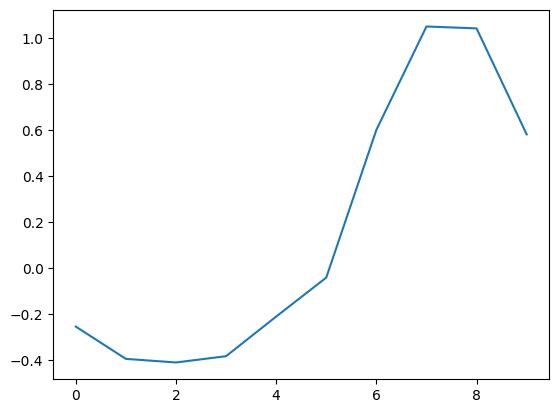

In [96]:
plt.plot(model.predict(X_val[0:10]))

# extra

In [73]:
def inverse_scale_target(y_scaled, scaler, target_col, n_features):
    dummy = np.zeros((1, n_features))
    dummy[0, target_col] = y_scaled
    return scaler.inverse_transform(dummy)[0, target_col]


ARTIFACTS = {
    "scaler": scaler,
    "window_size": 3,
    "target_col": df.columns.get_loc("P_avg"),
    "feature_columns": df.columns.tolist(),
}

def predict_next_step(
    model,
    history_df,
    artifacts
):
    scaler = artifacts["scaler"]
    window_size = artifacts["window_size"]
    target_col = artifacts["target_col"]

    # 1. Feature engineering
    df_feat = feature_pipeline(history_df)

    # 2. Scaling (NO FIT)
    df_scaled = df_feat.copy()
    df_scaled[:] = scaler.transform(df_feat)

    # 3. Extract last window
    last_window = df_scaled.to_numpy()[-window_size:]
    X = last_window[np.newaxis, :, :]  # (1, window, features)

    # 4. Predict
    y_scaled = model.predict(X)

    return y_scaled[0, 0] if y_scaled.ndim > 1 else y_scaled[0]

def inverse_scale_target(y_scaled, scaler, target_col, n_features):
    dummy = np.zeros((1, n_features))
    dummy[0, target_col] = y_scaled
    return scaler.inverse_transform(dummy)[0, target_col]

def predict_n_steps(
    model,
    history_df,
    artifacts,
    n_steps=24
):
    preds = []
    df = history_df.copy()

    for _ in range(n_steps):
        y_scaled = predict_next_step(model, df, artifacts)
        y = inverse_scale_target(
            y_scaled,
            artifacts["scaler"],
            artifacts["target_col"],
            df.shape[1]
        )

        preds.append(y)

        # append prediction as new row (autoregressive)
        new_row = df.iloc[-1].copy()
        new_row.iloc[artifacts["target_col"]] = y
        df = pd.concat([df, new_row.to_frame().T])

    return np.array(preds)

NameError: name 'df' is not defined

# notes


In [ ]:
# Time-based split
train_df = df.iloc[:int(0.7 * len(df))]
val_df   = df.iloc[int(0.7 * len(df)):int(0.85 * len(df))]
test_df  = df.iloc[int(0.85 * len(df)):]

scaler = MinMaxScaler()

X_train, y_train = prepare_lagged_data(
    train_df,
    window_size=24,
    target_col=train_df.columns.get_loc("P_avg"),
    scaler=scaler,
    fit_scaler=True
)

X_val, y_val = prepare_lagged_data(
    val_df,
    window_size=24,
    target_col=train_df.columns.get_loc("P_avg"),
    scaler=scaler,
    fit_scaler=False
)

X_test, y_test = prepare_lagged_data(
    test_df,
    window_size=24,
    target_col=train_df.columns.get_loc("P_avg"),
    scaler=scaler,
    fit_scaler=False
)

In [ ]:
def plot_predictions(model, X, y):
    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
    plt.plot(df['Predictions'])
    plt.plot(df['Actuals'])
    return df, mse(y, predictions)

plot_predictions(model, X_val, y_val)